Compute histogram of `tissue_general` values for "primary representations" of cells in the [CELLxGENE Census], using [TileDB-SOMA]:

[TileDB-SOMA]: https://github.com/single-cell-data/TileDB-SOMA
[CELLxGENE Census]: https://chanzuckerberg.github.io/cellxgene-census/

In [1]:
from somacore import AxisQuery
from tiledbsoma import Experiment, SOMATileDBContext

meas = "RNA"
layer = "raw"
census = "2024-07-01"
exp_uri = f"s3://cellxgene-census-public-us-west-2/cell-census/{census}/soma/census_data/homo_sapiens"
exp = Experiment.open(
    exp_uri,
    context=SOMATileDBContext(tiledb_config={
        "vfs.s3.no_sign_request": "true",
        "vfs.s3.region": "us-west-2"
    })
)
query = exp.axis_query(
    meas,
    obs_query=AxisQuery(value_filter="is_primary_data == True"),
)
query.n_obs

44265932

In [ ]:
%%time
primary = query.obs().concat().to_pandas()

In [4]:
hist = primary.tissue_general.value_counts().sort_values(ascending=False)
hist

tissue_general
brain                       13776355
blood                        9863575
lung                         3677225
breast                       2380941
eye                          2215660
heart                        1559974
kidney                       1289798
small intestine               968308
liver                         962947
skin of body                  731363
colon                         537914
placenta                      532845
respiratory system            494777
bone marrow                   452866
adrenal gland                 449892
lymph node                    407199
endocrine gland               398252
reproductive system           364425
spleen                        361303
nose                          313887
stomach                       278277
adipose tissue                262240
pancreas                      188412
esophagus                     170900
embryo                        165937
fallopian tube                144666
prostate gland         

In [3]:
import plotly.express as px

In [27]:
from utz import *

Wrote plot JSON to census_tissue_hist.json
Wrote plot image to census_tissue_hist.png


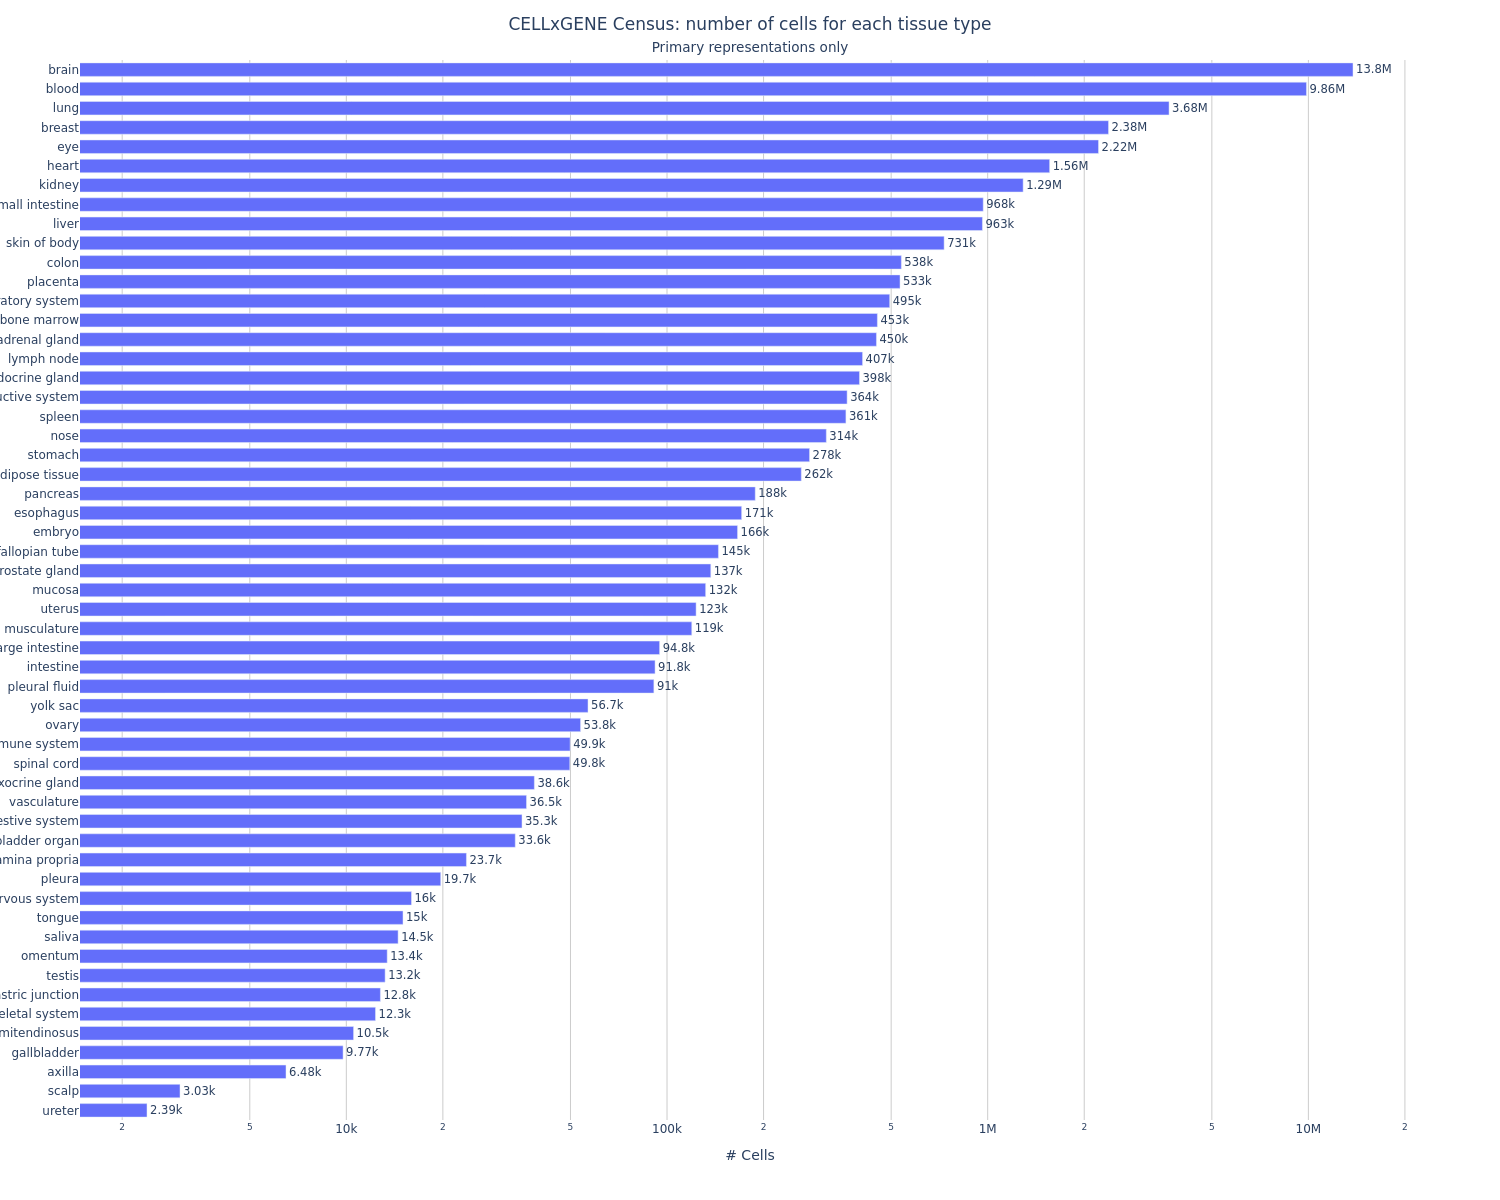

In [85]:
s = hist[::-1].rename('# Cells')

def human_format(num):
    if num > 1e6:
        return f'{(num / 1e6):.3g}M'
    else:
        return f'{(num / 1e3):.3g}k'

plot(
    px.bar(
        s,
        orientation='h',
        log_x=True,
        labels={
            'variable': '',
            'value': s.name,
        },
    ).update_traces(
        text=[human_format(val) for val in s],
        textposition='outside',
    ),
    name='census_tissue_hist',
    title=["CELLxGENE Census: number of cells for each tissue type", "Primary representations only"],
    w=1500, h=1200,
    legend=False,
    xgrid='#ccc', ygrid=None,
    #title_pad={'t': 60},
    margin={'l': 100, 't': 100},
    y='',
    show='png',
    #yaxis_side='left',
    #yaxis_position=0.1,
    autosize=False,
    #xaxis_domain=[0.4, 1.0],
    xaxis_automargin=False,
    yaxis_automargin=False,
    bargap=.3,
    #title_y=1,
    #title_yanchor='center',
    #title_yref='container'
)